In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # we will use this library for --> (mode, skew, kurtosis, iqr) 

In [16]:
df_2021 = pd.read_csv('world-happiness-report-2021.csv')

In [3]:
df1_2021= df_2021[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].copy() 

In [17]:
df1_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


### Basic Score Explanations of the Variables:
- **Ladder score**: Happiness score. 0 lowest, 10 maximum

- **Social Support**: Perceived social support score 0 lowest, 10 maximum

- **Freedom to make life choices**: Perceived freedom of expression 0 lowest, 10 maximum
- **Perceptions of corruption**: Perceived corruption and kind of distrust in institutions  0 lowest, 10 maximum distrust

In [18]:
df1_2021.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


#### **Rule of thumb**:

- If mean is bigger than median, skewed RIGHT (positive).
- If mean is equal to median, symmetric.
- If median is bigger than mean, skewed LEFT (negative).

Reference : Course materials

In [19]:
df1_2021['Logged GDP per capita'].describe()

count    149.000000
mean       9.432208
std        1.158601
min        6.635000
25%        8.541000
50%        9.569000
75%       10.421000
max       11.647000
Name: Logged GDP per capita, dtype: float64

#### **Rule of thumb**:

- If skewness is less than −1 or greater than +1, the distribution is highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
- If skewness is between −½ and +½, the distribution is approximately symmetric.

Reference: https://brownmath.com/stat/shape.htm

In [20]:
stats.skew(df1_2021['Logged GDP per capita'])

-0.3484712781192719

Since skew score is -0.3, we can safely assume that distribution is approximately symmetric.

#### **Rule of thumb**:

- If kurtosis is bigger than 0, compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.
- In normal distribution, kurtosis is = 0 
- If kurtosis is less than 0, Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.

Reference: https://brownmath.com/stat/shape.htm

In [21]:
stats.kurtosis(df1_2021['Logged GDP per capita'])

-0.8283005045350476

Since kurtosis score is less than 0,  we can safely assume that compared to normal distribution;
its tails are shorter and its central peak is lower and broader.

<Figure size 2800x2400 with 0 Axes>

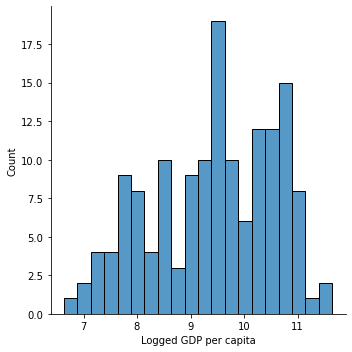

In [22]:
plt.figure(figsize=(14,12),dpi=200)
sns.displot(x='Logged GDP per capita', data=df1_2021, bins=20);

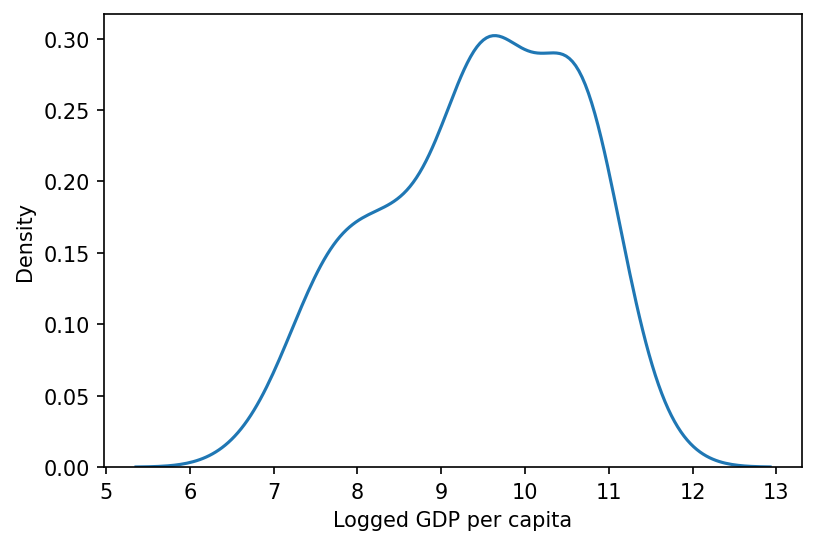

In [23]:
plt.figure(figsize=(6,4),dpi=150)
sns.kdeplot(x='Logged GDP per capita', data=df1_2021);

In [24]:
df1_2021['Logged GDP per capita'].describe()

count    149.000000
mean       9.432208
std        1.158601
min        6.635000
25%        8.541000
50%        9.569000
75%       10.421000
max       11.647000
Name: Logged GDP per capita, dtype: float64

In [25]:
Q1,Q3= np.percentile(df1_2021['Logged GDP per capita'],[25,75])
Q1, Q3

(8.541, 10.421)

In [26]:
IQR = Q3-Q1
IQR

1.879999999999999

In [27]:
stats.iqr(df1_2021['Logged GDP per capita'])

1.879999999999999

In [28]:
minimum = Q1-1.5*IQR
minimum

5.721000000000002

In [29]:
maximum = Q3+1.5*IQR
maximum

13.240999999999998

In [30]:
potential_outliers = df1_2021[(df1_2021['Logged GDP per capita']<minimum) |(df1_2021['Logged GDP per capita'] > maximum)]
potential_outliers

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


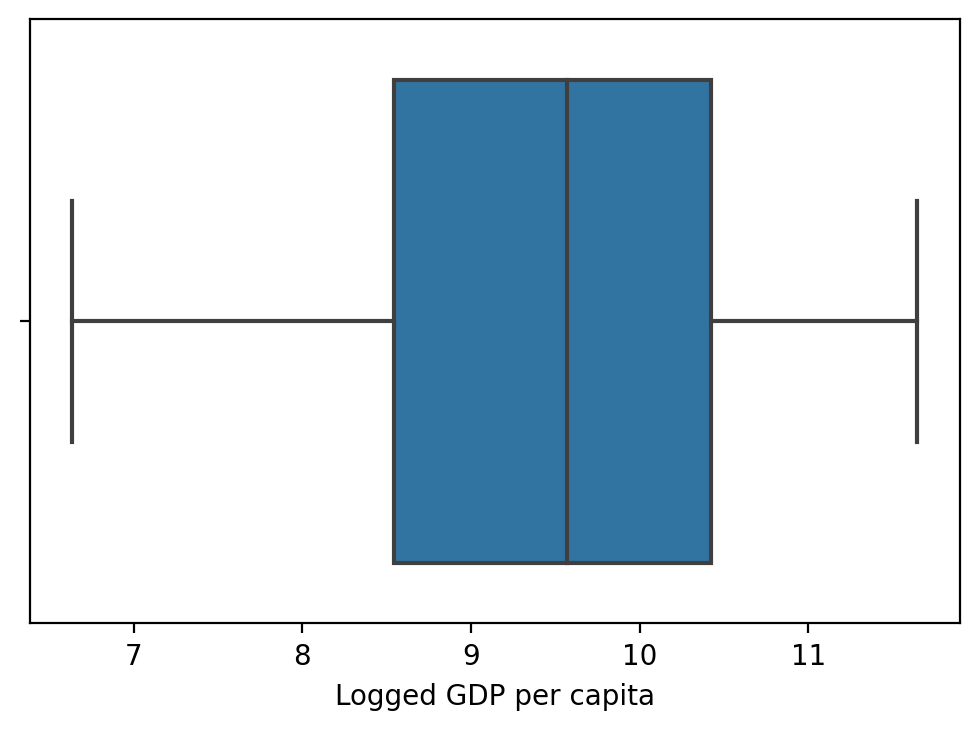

In [31]:
plt.figure(figsize=(6,4),dpi=200)
sns.boxplot(x='Logged GDP per capita', data=df1_2021, orient='h');

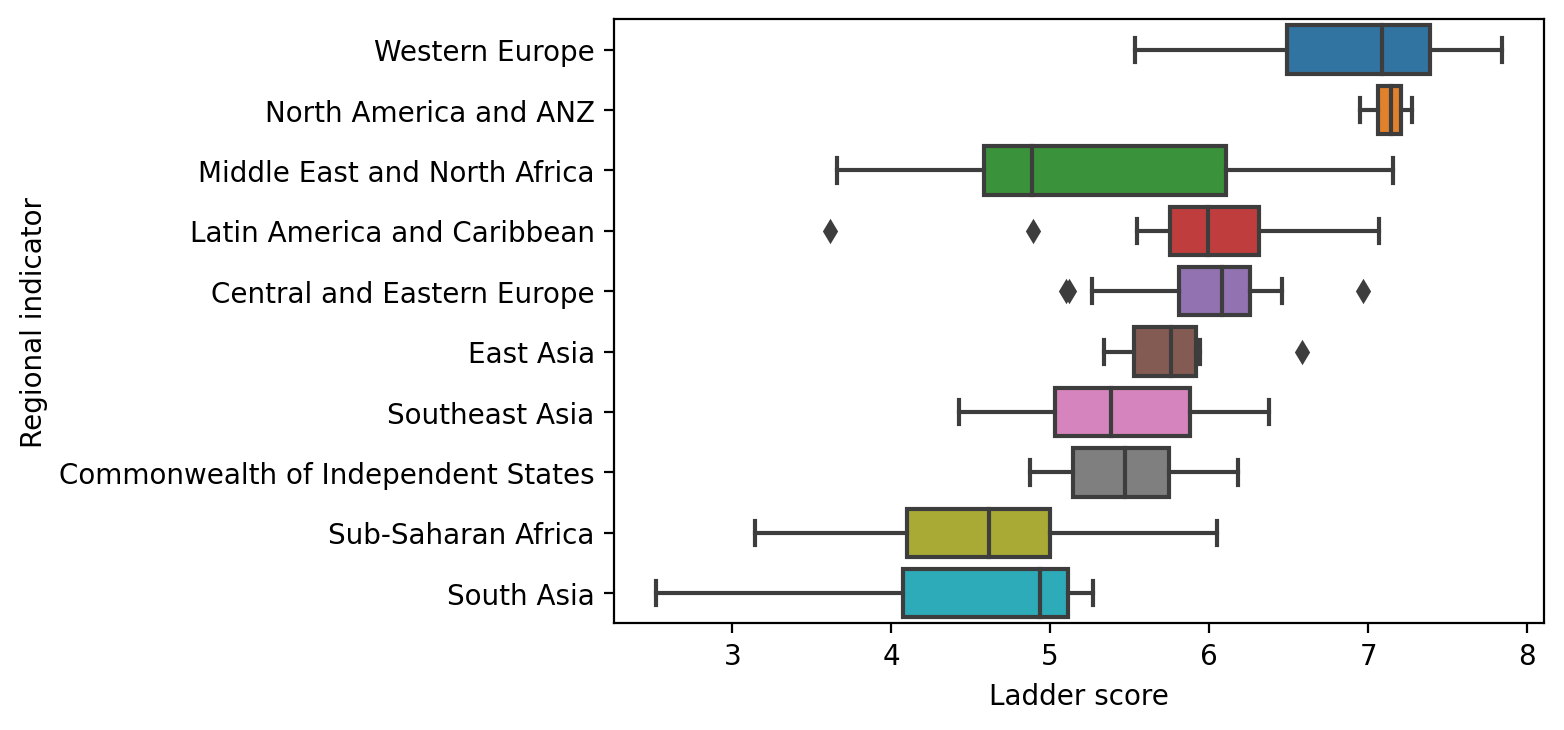

In [32]:
plt.figure(figsize=(6,4),dpi=200)
sns.boxplot(x='Ladder score', y='Regional indicator', data=df1_2021);

In [58]:
df1_2021.groupby('Regional indicator').get_group('Central and Eastern Europe')['Ladder score'].describe()

count    17.000000
mean      5.984765
std       0.493325
min       5.101000
25%       5.813000
50%       6.078000
75%       6.255000
max       6.965000
Name: Ladder score, dtype: float64

In [36]:
center_east_europe = df1_2021[df1_2021['Regional indicator']=='Central and Eastern Europe']

In [37]:
center_east_europe['Ladder score'].describe()

count    17.000000
mean      5.984765
std       0.493325
min       5.101000
25%       5.813000
50%       6.078000
75%       6.255000
max       6.965000
Name: Ladder score, dtype: float64

In [38]:
stats.skew(center_east_europe['Ladder score'])

-0.32125033914133433

In [39]:
stats.kurtosis(center_east_europe['Ladder score'])

-0.20615976735179586

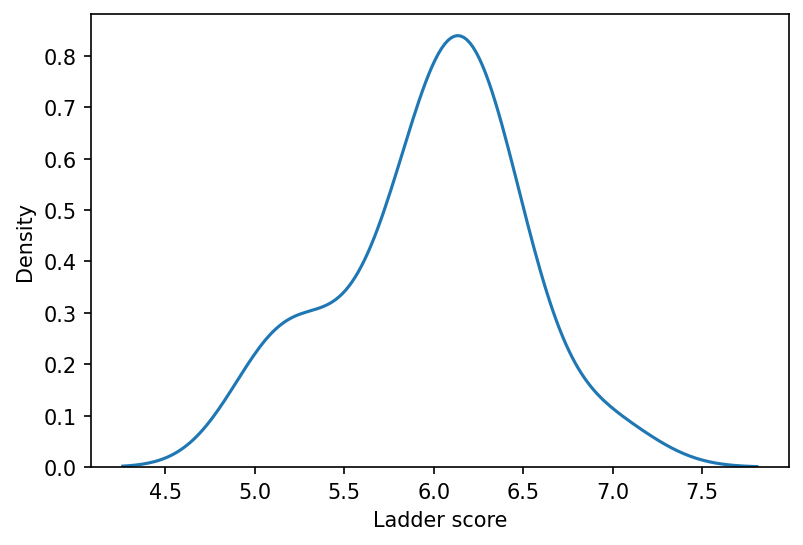

In [40]:
plt.figure(figsize=(6,4),dpi=150)
sns.kdeplot(x='Ladder score', data=center_east_europe);

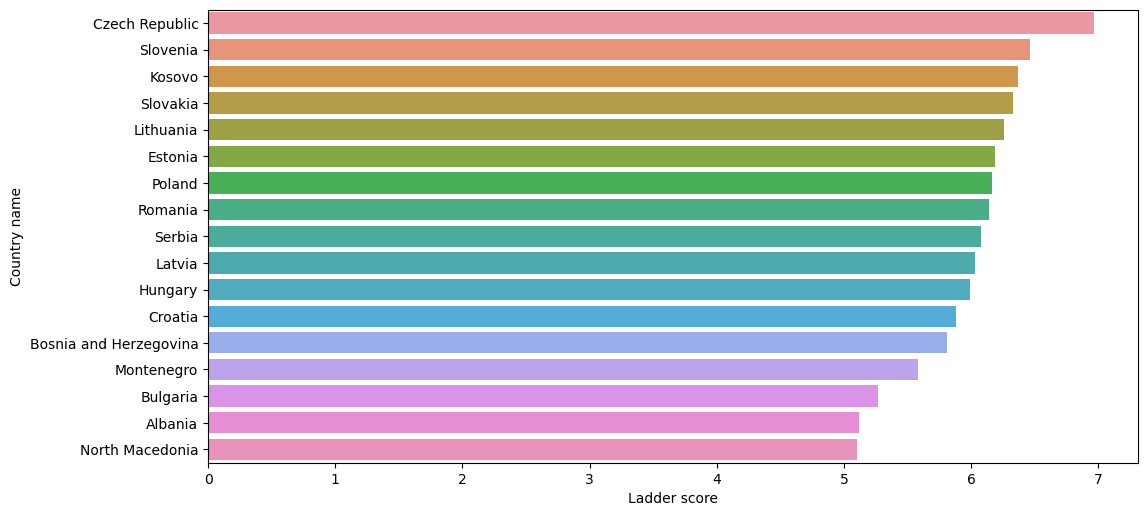

In [41]:
plt.figure(figsize=(12,6),dpi=100)
sns.barplot(y='Country name', x='Ladder score', data=center_east_europe);

In [42]:
grp = center_east_europe.groupby('Country name')['Ladder score'].mean().sort_values(ascending=False).reset_index()
grp.columns

Index(['Country name', 'Ladder score'], dtype='object')

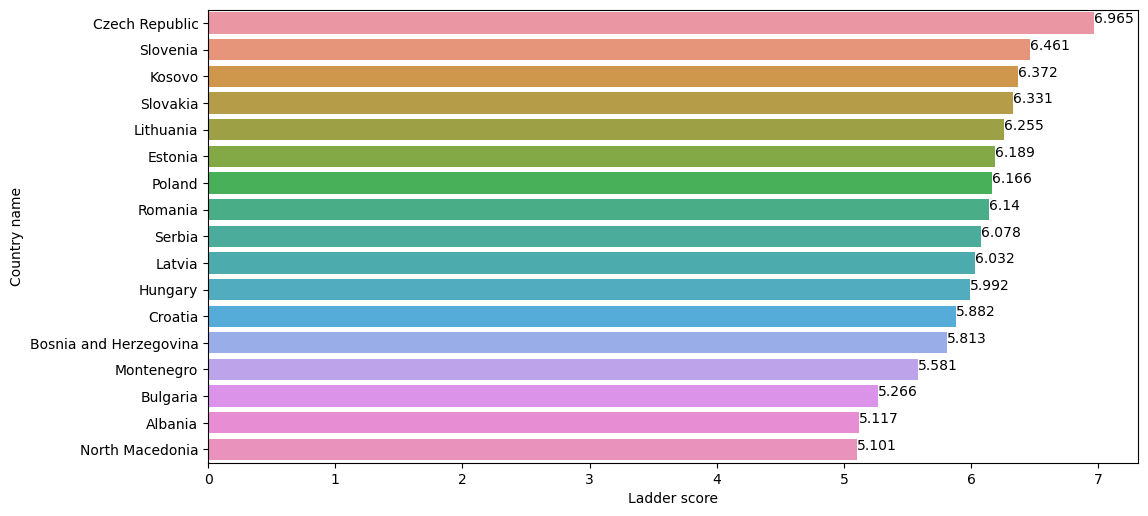

In [43]:
plt.figure(figsize=(12,6),dpi=100)
ladder =sns.barplot(y='Country name', x='Ladder score', data=grp);

for index, value in enumerate(grp['Ladder score']):
    plt.text(value, index, str(value))

In [44]:
Q1,Q3= np.percentile(center_east_europe['Ladder score'],[25,75])
Q1, Q3

(5.813, 6.255)

In [45]:
IQR = Q3-Q1
IQR

0.44200000000000017

In [46]:
minimum = Q1-1.5*IQR
minimum

5.1499999999999995

In [47]:
maximum = Q3+1.5*IQR
maximum

6.918

In [48]:
potential_outliers = center_east_europe[(center_east_europe['Ladder score']<minimum) |(center_east_europe['Ladder score'] > maximum)]
potential_outliers

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
17,Czech Republic,Central and Eastern Europe,6.965,10.556,0.947,70.807,0.858,-0.208,0.868
92,Albania,Central and Eastern Europe,5.117,9.520,0.697,68.999,0.785,-0.030,0.901
93,North Macedonia,Central and Eastern Europe,5.101,9.693,0.805,65.474,0.751,0.038,0.905


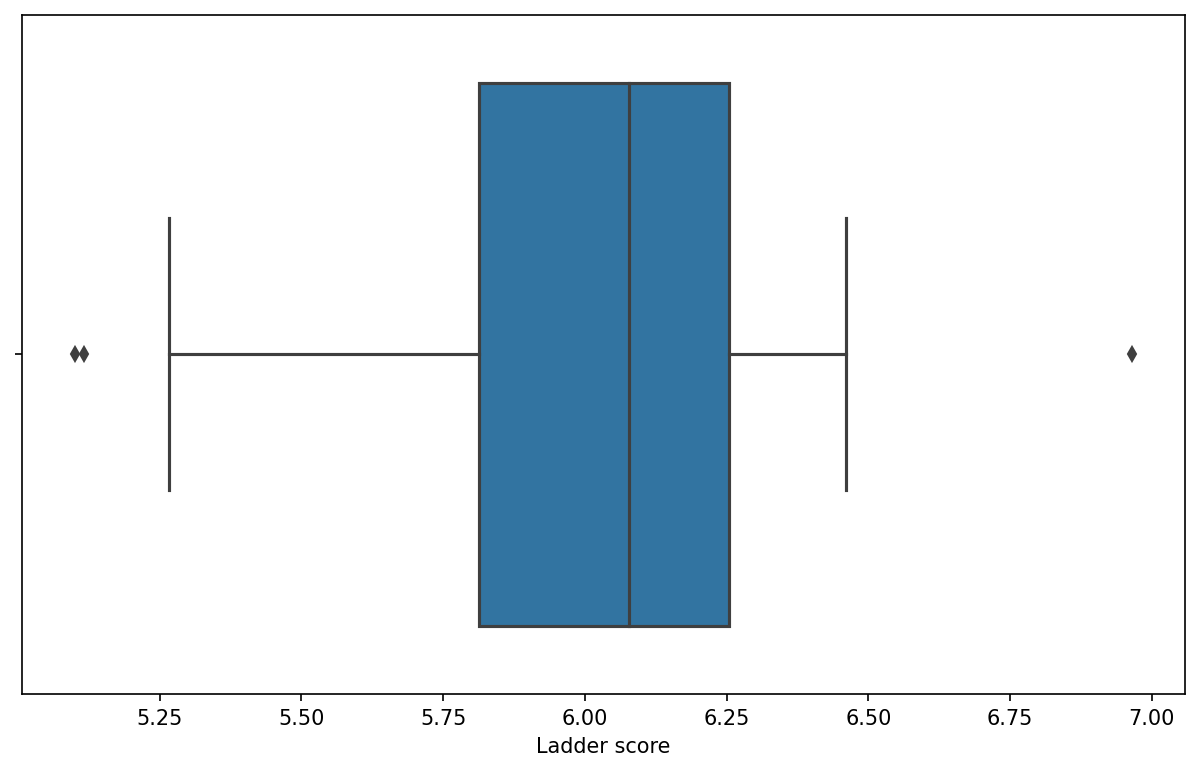

In [49]:
plt.figure(figsize=(10,6), dpi=150)
sns.boxplot(x= 'Ladder score', data= center_east_europe, orient='h');

### **Scatter Plot**

In [50]:
df1_2021.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


### **Correlation is not CAUSATION !!!!!**

- We are only looking for whether variations in one variable are correlated with variations in another variable.

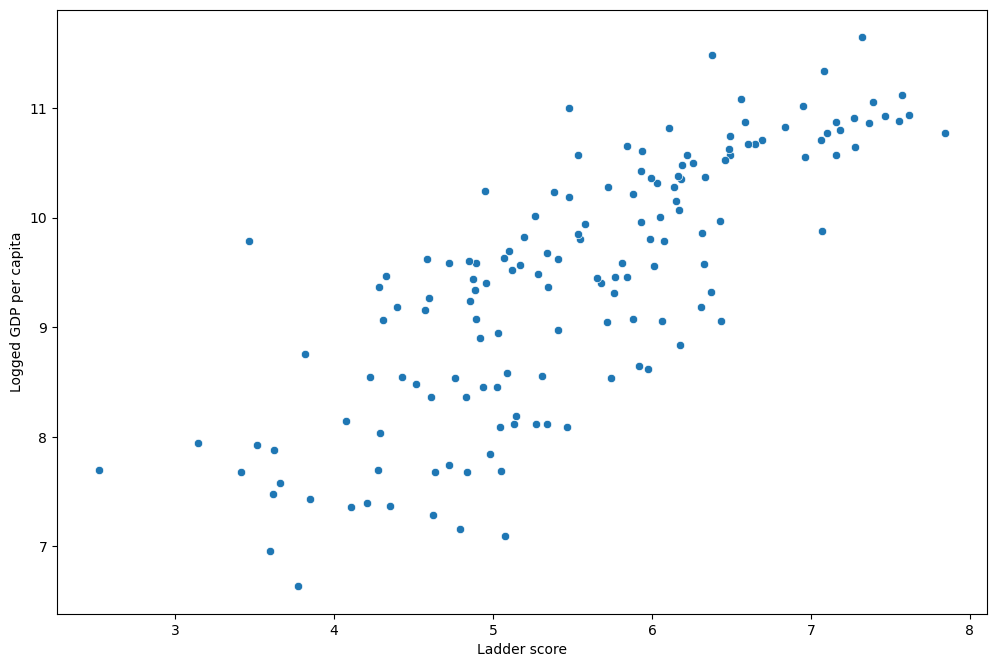

In [52]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='Ladder score', y='Logged GDP per capita', data= df1_2021);

<AxesSubplot:xlabel='Ladder score', ylabel='Logged GDP per capita'>

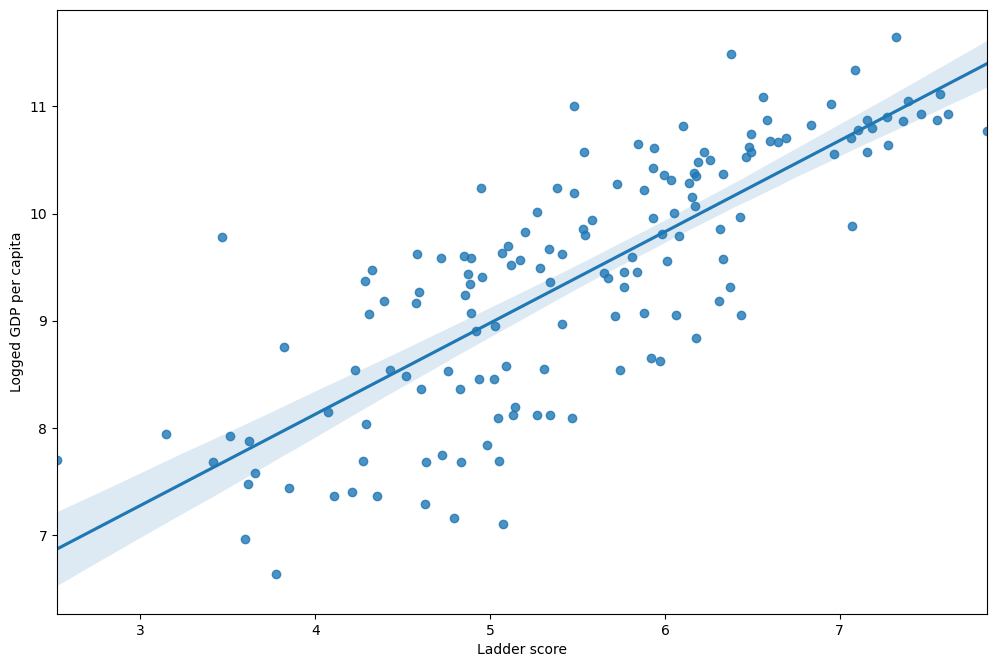

In [54]:
plt.figure(figsize=(12,8), dpi=100)
sns.regplot(x='Ladder score', y='Logged GDP per capita', data= df1_2021)

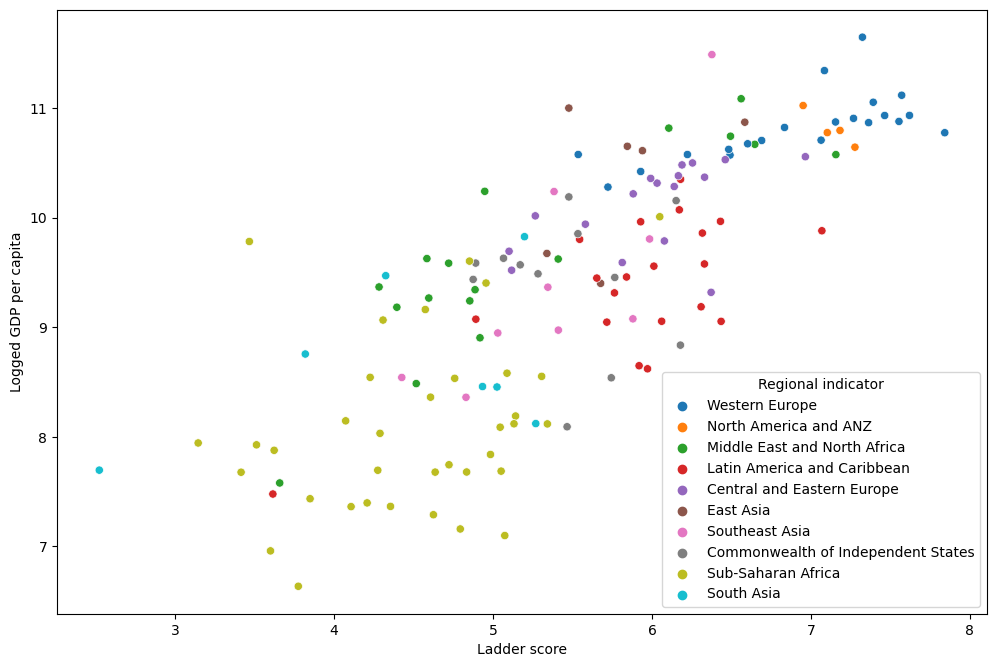

In [56]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='Ladder score', y='Logged GDP per capita', hue= 'Regional indicator',data= df1_2021);

## **Covariance**

In [22]:
df1_2021.cov()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.153312,0.982658,0.093386,5.577875,0.073969,-0.002880,-0.081059
Logged GDP per capita,0.982658,1.342357,0.104532,6.733455,0.056767,-0.034786,-0.071087
Social support,0.093386,0.104532,0.013199,0.561887,0.006288,-0.001990,-0.004184
Healthy life expectancy,5.577875,6.733455,0.561887,45.725227,0.353668,-0.164783,-0.441597
Freedom to make life choices,0.073969,0.056767,0.006288,0.353668,0.012844,0.002893,-0.008153
Generosity,-0.002880,-0.034786,-0.001990,-0.164783,0.002893,0.022697,-0.004427
Perceptions of corruption,-0.081059,-0.071087,-0.004184,-0.441597,-0.008153,-0.004427,0.032122


In [24]:
np.cov(df1_2021['Ladder score'], df1_2021['Logged GDP per capita'])

array([[1.15331183, 0.98265803],
       [0.98265803, 1.34235731]])

- Covariance defines the directional association between the variables. Covariance values range from -inf to +inf where a positive value denotes that both the variables move in the same direction and a negative value denotes that both the variables move in opposite directions.



source: https://stackabuse.com/covariance-and-correlation-in-python

## **Correlation**

In [25]:
np.corrcoef(df1_2021['Ladder score'], df1_2021['Logged GDP per capita'])

array([[1.       , 0.7897597],
       [0.7897597, 1.       ]])